In [11]:
### Coursework
from numpy.random import rand
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import poisson
import pandas as pd

In [12]:
### Question 1
k0 = 0.2 # Production of mRNA, units: s^-1
k1 = 0.01 # Decay of mRNA


In [13]:
### Question 2

# Defining propensities (rate reactions)
k0 = 0.2
k1 = 0.01

# Defining propensities (rate reactions)
def propensities(x):
    return [k0, k1*x]

# Defining reaction times (the two reactions race against each other)
def reactionTimes(x):
    a = propensities(x) 
    
    # Setting a filter: no error if a == 0
    # aInv is the inverse of a, so the lower the aInv, the greater the chance of that reaction happening
    aInv = [ 1/s if s>0 else np.inf for s in a ]
    
    # Returns 2x1 list; the lower the number, the shorter the time that the reaction took this iteration
    # The lower number 'wins the race'
    return -np.log(rand(2))*aInv

# Defining Stochastic Simulation Algorithm
def ssa(x, tIn, tOut):
    t = tIn
    stoichiometry = [+1, -1] # Whether the reaction increases or decreases number of mRNA
    
    while t < tOut:
        rt= reactionTimes(x)
        
        # Reaction time
        tau = np.min(rt) # Samples minimum from array (reaction that 'won')
        
        # Returns index of the reaction (which reaction was chosen)
        idx = np.argmin(rt)
        
        # Update state of time with increment tau
        if t+tau > tOut:
            t = tOut
        else:
            t += tau
            x += stoichiometry[idx]
    return x

# Mu is the deterministic mean
mu = k0/k1


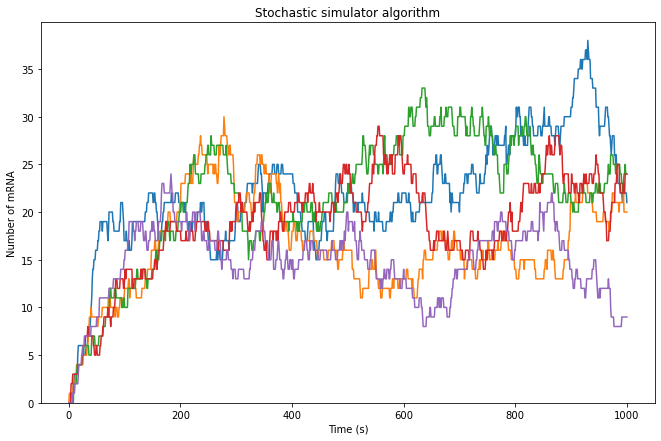

In [14]:
# Setting up the Stochastic Simulation Algorithm

# Storing results in a dataframe
results = pd.DataFrame()

# Creating a plot 
fig, ax = plt.subplots(figsize=(11,7))

# Running the stochastic simulator with repeats
for j in range(5):
    # Define initial mRNA count and initial time
    x = 0
    t = 0.
    dt = 1

    mrna = [x]
    time = [t]
    
    # Iterate over time, adding dt as a time increment
    for i in range(1000):
        x = ssa(x, t, t+dt)
        time.append(time[-1]+dt)
        mrna.append(x)

    # Plot number of mRNA as a function of time
    ax.plot(time, mrna)

# Setting graph titles
title = "Stochastic simulator algorithm"
y_title = "Number of mRNA"
x_title = "Time (s)"

ax.set_title(title)
ax.set_ylabel(y_title)
ax.set_xlabel(x_title)
ax.set_ylim(bottom=0)
plt.show(fig)


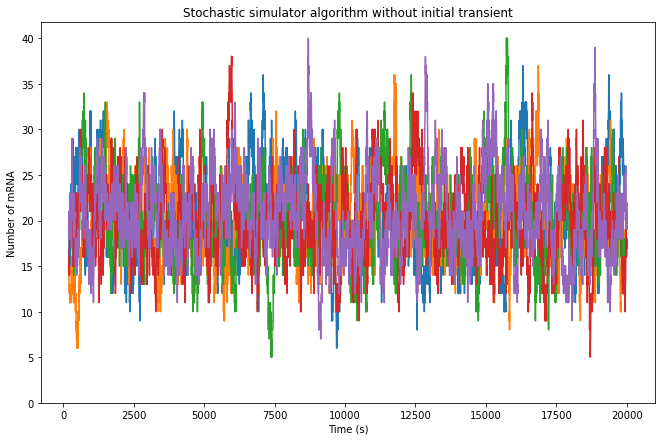

     mu       mean   variance  Fano factor
0  20.0  20.174335  22.215959     1.101199
1  20.0  19.961265  17.797550     0.891604
2  20.0  20.128428  19.953356     0.991302
3  20.0  19.913792  17.804446     0.894076
4  20.0  20.745417  20.283503     0.977734
Mean Fano factor: 0.9711832007377094


In [33]:
### Question 3
# Running SSA but removing the initial transient by graphical inspection

# Storing results in a dataframe
results = pd.DataFrame()

# Creating a plot 
fig, ax = plt.subplots(figsize=(11,7))

# Set initial t value to plot
t0_plot = 200

# Running the stochastic simulator with repeats
for j in range(5):
    # Define initial mRNA count and initial time
    x = 0
    t = 0.
    dt = 1

    mrna = [x]
    time = [t]
    
    # Iterate over time, adding dt as a time increment
    for i in range(20000):
        x = ssa(x, t, t+dt)
        time.append(time[-1]+dt)
        mrna.append(x)

    # Output results in dataframe
    mean = np.mean(mrna[t0_plot:])
    var = np.var(mrna[t0_plot:])
    fano = var/mean
    results = results.append({"mu": mu, "mean":mean, "variance":var, "Fano factor":fano}, ignore_index=True)
    
    # Plot number of mRNA as a function of time
    ax.plot(time[t0_plot:], mrna[t0_plot:])

# Setting graph titles
title = "Stochastic simulator algorithm without initial transient"
y_title = "Number of mRNA"
x_title = "Time (s)"

ax.set_title(title)
ax.set_ylabel(y_title)
ax.set_xlabel(x_title)
ax.set_ylim(bottom=0)
plt.show(fig)

print(results)
print("Mean Fano factor: {}".format(np.mean(results['Fano factor'])))


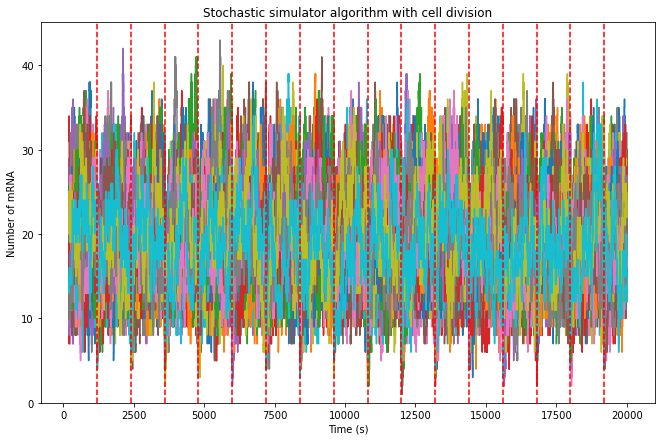

      mu       mean   variance  Fano factor
0   20.0  19.547700  21.157982     1.082377
1   20.0  18.570325  18.061124     0.972580
2   20.0  19.105197  26.271697     1.375107
3   20.0  18.754406  25.276030     1.347738
4   20.0  19.230796  22.784266     1.184780
..   ...        ...        ...          ...
95  20.0  19.248220  21.252917     1.104150
96  20.0  18.739458  22.461030     1.198596
97  20.0  18.860815  21.682966     1.149630
98  20.0  19.493258  25.676448     1.317196
99  20.0  18.455836  19.691916     1.066975

[100 rows x 4 columns]
Mean Fano factor: 1.1622169966236813


In [31]:
### Question 4

# Storing results in a dataframe
results = pd.DataFrame()

# Creating a plot 
fig, ax = plt.subplots(figsize=(11,7))

# Running the stochastic simulator, no repeats, with cell division

# Running the stochastic simulator with repeats
for j in range(100):

    # Define initial mRNA count and initial time
    x = 0
    t = 0.
    dt = 1
    # First time point to be plotted
    t0_plot = 200

    mrna = [x]
    time = [t]
    t_celldiv = [] # Time points at which the cell divides

    # Iterate over time, adding dt as a time increment
    for i in range(20000):
        # Binomial sampling if t = 20 min
        if ((i % 1200 == 0) and (i != 0)):
            x = np.random.binomial(mrna[-1], 0.5)
            t_celldiv.append(i)
        # Regardless of whether the cell splits, mRNA synthesis/degradation still happens
        x = ssa(x, t, t+dt)
        time.append(time[-1]+dt)
        mrna.append(x)

    # Plot number of mRNA as a function of time
    ax.plot(time[t0_plot:], mrna[t0_plot:])
    
    # Output results in dataframe
    mean = np.mean(mrna[t0_plot:])
    var = np.var(mrna[t0_plot:])
    fano = var/mean
    results = results.append({"mu": mu, "mean":mean, "variance":var, "Fano factor":fano}, ignore_index=True)

# Setting graph titles
title = "Stochastic simulator algorithm with cell division"
y_title = "Number of mRNA"
x_title = "Time (s)"

ax.set_title(title)
ax.set_ylabel(y_title)
ax.set_xlabel(x_title)
ax.set_ylim(bottom=0)

# Add lines for cell division
for k in t_celldiv:
    ax.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')

plt.show(fig)


print(results)
print("Mean Fano factor: {}".format(np.mean(results['Fano factor'])))

In [6]:
### Do repeats up to j = 100, same thing for the previous one before cell division

In [51]:
### Question 5

k2 = 5

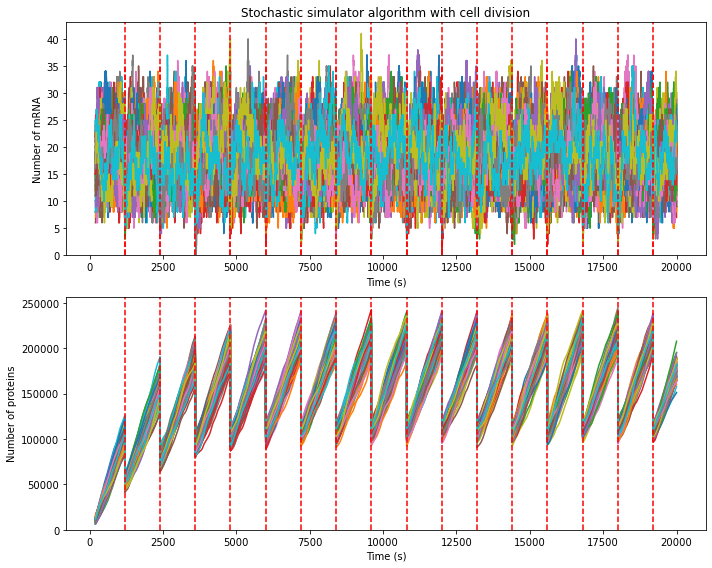

mRNA levels:
      mu       mean   variance  Fano factor
0   20.0  18.292662  23.755216     1.298620
1   20.0  17.608202  18.702410     1.062142
2   20.0  17.923741  17.292402     0.964776
3   20.0  17.873996  22.996547     1.286592
4   20.0  18.431948  18.262540     0.990809
..   ...        ...        ...          ...
95  20.0  17.495026  18.752576     1.071880
96  20.0  17.503611  19.924145     1.138288
97  20.0  17.785061  19.898249     1.118818
98  20.0  18.543811  23.378731     1.260730
99  20.0  17.986869  19.868218     1.104596

[100 rows x 4 columns]
mRNA 
Average mean: 17.91579213171052 
Average Fano factor: 1.1417032271692722

protein levels:
             mean      variance   Fano factor
0   150928.289733  1.634448e+09  8.934995e+07
1   142679.609616  1.606450e+09  9.123305e+07
2   146122.955406  1.689452e+09  9.425778e+07
3   146956.150952  1.762790e+09  9.862317e+07
4   151883.461189  1.599753e+09  8.679242e+07
..            ...           ...           ...
95  142319.898742

In [53]:

# Storing results in a dataframe
results_mrna = pd.DataFrame()
results_protein = pd.DataFrame()

# Creating a plot 
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Running the stochastic simulator, no repeats, with cell division

# Running the stochastic simulator with repeats
for j in range(100):

    # Define initial mRNA count and initial time
    x = 0
    y = 0
    t = 0.
    dt = 1
    # First time point to be plotted
    t0_plot = 200

    mrna = [x]
    time = [t]
    protein = [y]
    t_celldiv = [] # Time points at which the cell divides

    # Iterate over time, adding dt as a time increment
    for i in range(20000):
        # Binomial sampling if t = 20 min
        if ((i % 1200 == 0) and (i != 0)):
            x = np.random.binomial(mrna[-1], 0.5)
            y = np.random.binomial(protein[-1], 0.5)
            t_celldiv.append(i)
        # Regardless of whether the cell splits, mRNA and protein synthesis/degradation still happen
        x = ssa(x, t, t+dt)
        y += k2 * x
        time.append(time[-1]+dt)
        mrna.append(x)
        protein.append(y)

    # Plot number of mRNA as a function of time
    ax1.plot(time[t0_plot:], mrna[t0_plot:])
    ax2.plot(time[t0_plot:], protein[t0_plot:])
    
    # Output results in dataframe
    mean_1 = np.mean(mrna[t0_plot:])
    var_1 = np.var(mrna[t0_plot:])
    fano_1 = var_1/mean_1
    results_mrna = results_mrna.append({"mu": mu, "mean":mean_1, "variance":var_1, "Fano factor":fano_1}, ignore_index=True)
    
    mean_2 = np.mean(protein[t0_plot:])
    var_2 = np.var(protein[t0_plot:])
    fano_2 = var_2/mean_1
    results_protein = results_protein.append({"mean":mean_2, "variance":var_2, "Fano factor":fano_2}, ignore_index=True)

# Setting graph titles
title = "Stochastic simulator algorithm with cell division"
y_title1 = "Number of mRNA"
x_title1 = "Time (s)"

ax1.set_title(title)
ax1.set_ylabel(y_title1)
ax1.set_xlabel(x_title1)
ax1.set_ylim(bottom=0)

# Add lines for cell division
ax1.vlines(t_celldiv, 0, np.amax(mrna), colors='red', linestyles='dashed')

# Protein graph
y_title2 = "Number of proteins"
x_title2 = "Time (s)"

ax2.set_ylabel(y_title2)
ax2.set_xlabel(x_title2)
ax2.set_ylim(bottom=0)

# Add lines for cell division
for k in t_celldiv:
    ax1.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')
    ax2.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')


plt.tight_layout()
plt.show(fig)

print("mRNA levels:")
print(results_mrna)
print("mRNA \nAverage mean: {} \nAverage Fano factor: {}".format(np.mean(results_mrna['mean']), np.mean(results_mrna['Fano factor'])))
print("\nprotein levels:")
print(results_protein)
print("Protein \nAverage mean: {} \nAverage Fano factor: {}".format(np.mean(results_protein['mean']),np.mean(results_protein['Fano factor'])))


In [140]:
### Question 6


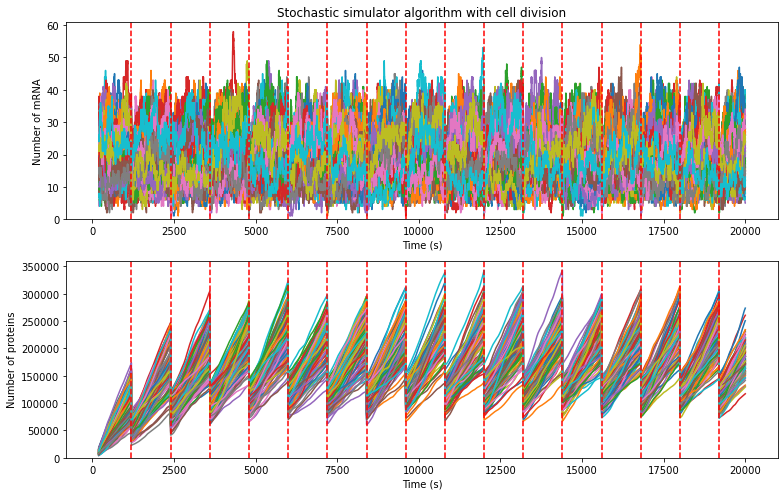

mRNA levels:
      mu       mean   variance  Fano factor
0   20.0  19.175395  53.791720     2.805247
1   20.0  21.295844  47.930354     2.250691
2   20.0  20.422201  33.249654     1.628113
3   20.0  18.929650  52.845563     2.791682
4   20.0  19.268673  42.316280     2.196118
..   ...        ...        ...          ...
95  20.0  17.747336  47.594916     2.681806
96  20.0  20.370335  51.608572     2.533516
97  20.0  16.462047  39.632025     2.407478
98  20.0  20.532448  52.297935     2.547087
99  20.0  19.254078  53.365120     2.771627

[100 rows x 4 columns]
Average mean: 19.062915004292712 
Average Fano factor: 2.614052008062819

protein levels:
             mean      variance   Fano factor
0   159809.641937  2.076680e+09  1.082992e+08
1   177090.513863  2.455219e+09  1.152910e+08
2   166463.641230  3.020735e+09  1.479143e+08
3   160462.443058  2.589372e+09  1.367892e+08
4   156007.735468  3.118774e+09  1.618572e+08
..            ...           ...           ...
95  145010.789859  1.92

In [55]:
# Storing results in a dataframe
results_mrna = pd.DataFrame()
results_protein = pd.DataFrame()

# Creating a plot 
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(11,7))

# Running the stochastic simulator with repeats
for j in range(100):

    # Define initial mRNA count and initial time
    x = 0
    y = 0
    t = 0.
    dt = 1
    # First time point to be plotted
    t0_plot = 200

    mrna = [x]
    time = [t]
    protein = [y]
    t_celldiv = [] # Time points at which the cell divides

    # Generate initial k0, where 0.1 <= k0 <= 0.4 s^-1
    k0 = np.random.uniform(0.1, 0.3)
    
    # Iterate over time, adding dt as a time increment
    for i in range(20000):
        # Binomial sampling if t = 20 min
        if ((i % 1200 == 0) and (i != 0)):
            x = np.random.binomial(mrna[-1], 0.5)
            y = np.random.binomial(protein[-1], 0.5)
            t_celldiv.append(i)
            
            # Generate k0, where 0.1 <= k0 <= 0.4 s^-1
            k0 = np.random.uniform(0.1, 0.3)
#            print("k0 = {}; i = {}; j = {}".format(k0, i, j))
        x = ssa(x, t, t+dt)
        y += k2 * x
        time.append(time[-1]+dt)
        mrna.append(x)
        protein.append(y)        

    # Plot number of mRNA as a function of time
    ax1.plot(time[t0_plot:], mrna[t0_plot:])
    ax2.plot(time[t0_plot:], protein[t0_plot:])
    
    # Output results in dataframe
    mean_1 = np.mean(mrna[t0_plot:])
    var_1 = np.var(mrna[t0_plot:])
    fano_1 = var_1/mean_1
    results_mrna = results_mrna.append({"mu": mu, "mean":mean_1, "variance":var_1, "Fano factor":fano_1}, ignore_index=True)
    
    mean_2 = np.mean(protein[t0_plot:])
    var_2 = np.var(protein[t0_plot:])
    fano_2 = var_2/mean_1
    results_protein = results_protein.append({"mean":mean_2, "variance":var_2, "Fano factor":fano_2}, ignore_index=True)

# Setting graph titles
title = "Stochastic simulator algorithm with cell division"
y_title1 = "Number of mRNA"
x_title1 = "Time (s)"

ax1.set_title(title)
ax1.set_ylabel(y_title1)
ax1.set_xlabel(x_title1)
ax1.set_ylim(bottom=0)

# Protein graph
y_title2 = "Number of proteins"
x_title2 = "Time (s)"

ax2.set_ylabel(y_title2)
ax2.set_xlabel(x_title2)
ax2.set_ylim(bottom=0)

# Add lines for cell division
for k in t_celldiv:
    ax1.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')
    ax2.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')

plt.tight_layout()
plt.show(fig)

print("mRNA levels:")
print(results_mrna)
print("Average mean: {} \nAverage Fano factor: {}".format(np.mean(results_mrna['mean']), np.mean(results_mrna['Fano factor'])))
print("\nprotein levels:")
print(results_protein)
print("Average mean: {} \nAverage Fano factor: {}".format(np.mean(results_protein['mean']),np.mean(results_protein['Fano factor'])))


In [ ]:

# Decomposing noise to intrinsic and extrinsico noise




Modify your simulation and estimate the Fano factor of mRNA numbers in this case.
Over ten simulations, up to time = 10,000 seconds, the average Fano factor was ________.


Can you explain why the Fano factor in this case different from the previous case. 
The Fano factor 


Please explain how you can decompose the total noise in gene expression into intrinsic and extrinsic noise. 
- choose one plot that has run long enough
- Q6 = total noise
- Q4 = intrinsic noise (total noise = intrinsic noise for this question = coefficient of variation = stdev/mean)
- [https://www.pnas.org/doi/10.1073/pnas.162041399]

Estimate the amount of extrinsic noise in mRNA due to variation in transcription rate. 
- total noise = extrinsic + intrinsic noise
- intrinsic noise in our model comprises of mRNA synthesis and degradation, mRNA dilution by cell cycle
- extrinsic noise comes from partition of transcription machinery
- there's a fluctutation in mRNA production rate, contributing to extrinsic noise

[Equations:]
- noise = standard deviatioon / mean (coefficient of variation)



Biologically, what could be the source of this extrinsic variability in the transcription rate
- different distribution of RNA polymerases
- changes in cellular environment cause ___

